<a href="https://colab.research.google.com/github/ianonai/AIResearchProject/blob/main/AI_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

In [ ]:
# check installed version
import pycaret
pycaret.__version__


'3.2.0'

1. Installing Repo and loading Bank_Marketing data

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
import pandas as pd

In [ ]:
data = pd.concat([X, y], axis=1)

In [ ]:
s = setup(data, target='y', session_id = 123)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 44)"
6,Transformed train set shape,"(31647, 44)"
7,Transformed test set shape,"(13564, 44)"
8,Ordinal features,4
9,Numeric features,7


In [ ]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
exp.setup(data, target = 'y', session_id = 123)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 44)"
6,Transformed train set shape,"(31647, 44)"
7,Transformed test set shape,"(13564, 44)"
8,Ordinal features,4
9,Numeric features,7


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9073,0.9316,0.9073,0.8983,0.9010,0.4932,0.5004,14.3260
lightgbm,Light Gradient Boosting Machine,0.9070,0.9289,0.9070,0.8979,0.9007,0.4910,0.4984,1.5510
gbc,Gradient Boosting Classifier,0.9047,0.9196,0.9047,0.8925,0.8947,0.4479,0.4634,5.3290
xgboost,Extreme Gradient Boosting,0.9039,0.9240,0.9039,0.8949,0.8979,0.4790,0.4851,1.2640
rf,Random Forest Classifier,0.9030,0.9203,0.9030,0.8894,0.8912,0.4242,0.4440,4.4040
lr,Logistic Regression,0.9003,0.8992,0.9003,0.8849,0.8859,0.3886,0.4148,4.8500
lda,Linear Discriminant Analysis,0.8997,0.9023,0.8997,0.8892,0.8926,0.4487,0.4561,0.7720
ridge,Ridge Classifier,0.8992,0.0000,0.8992,0.8824,0.8803,0.3467,0.3864,0.7730
ada,Ada Boost Classifier,0.8982,0.9047,0.8982,0.8836,0.8866,0.4025,0.4192,1.8530
et,Extra Trees Classifier,0.8980,0.9023,0.8980,0.8820,0.8842,0.3823,0.4050,4.4160


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9073,0.9316,0.9073,0.8983,0.9010,0.4932,0.5004,14.2520
lightgbm,Light Gradient Boosting Machine,0.9070,0.9289,0.9070,0.8979,0.9007,0.4910,0.4984,2.3710
gbc,Gradient Boosting Classifier,0.9047,0.9196,0.9047,0.8925,0.8947,0.4479,0.4634,5.1660
xgboost,Extreme Gradient Boosting,0.9039,0.9240,0.9039,0.8949,0.8979,0.4790,0.4851,1.0520
rf,Random Forest Classifier,0.9030,0.9203,0.9030,0.8894,0.8912,0.4242,0.4440,4.4750
lr,Logistic Regression,0.9003,0.8992,0.9003,0.8849,0.8859,0.3886,0.4148,4.8670
lda,Linear Discriminant Analysis,0.8997,0.9023,0.8997,0.8892,0.8926,0.4487,0.4561,0.9680
ridge,Ridge Classifier,0.8992,0.0000,0.8992,0.8824,0.8803,0.3467,0.3864,0.5490
ada,Ada Boost Classifier,0.8982,0.9047,0.8982,0.8836,0.8866,0.4025,0.4192,1.8670
et,Extra Trees Classifier,0.8980,0.9023,0.8980,0.8820,0.8842,0.3823,0.4050,4.3700


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ANALYZE MODEL

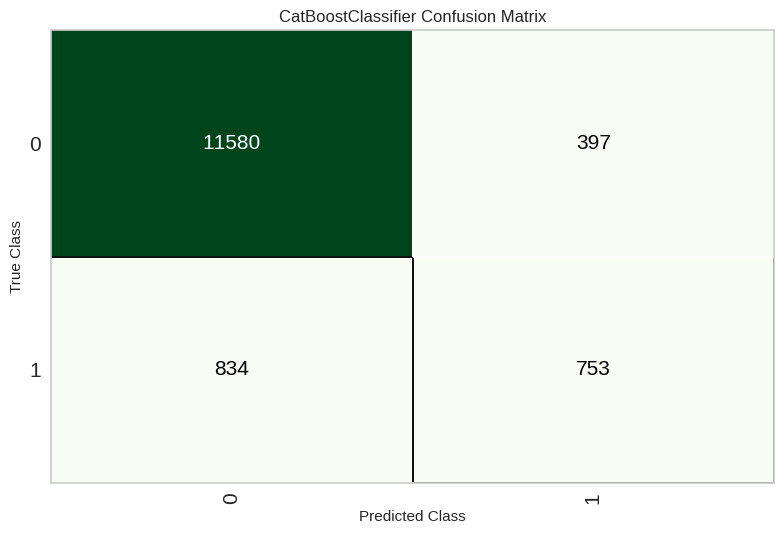

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

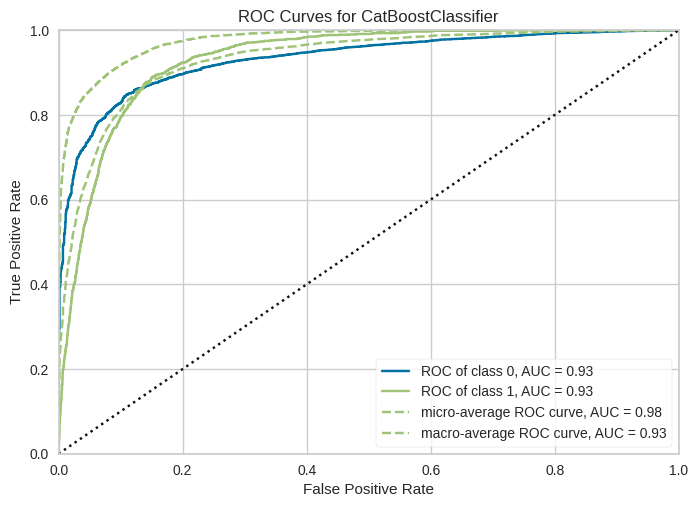

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

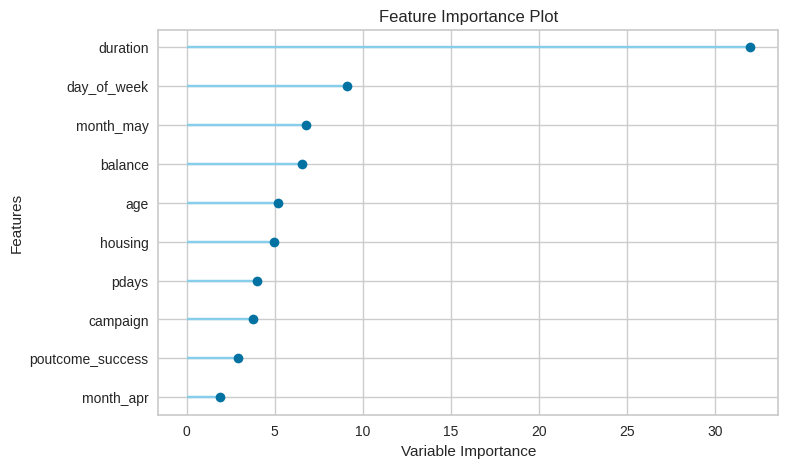

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9092,0.9322,0.9092,0.9003,0.9028,0.5012,0.5092


In [ ]:
# show predictions df
holdout_pred.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,prediction_label,prediction_score
5997,26,blue-collar,single,secondary,no,339,yes,no,NaN,26,may,165,5,-1,0,NaN,no,no,0.9913
39268,34,blue-collar,married,secondary,no,463,yes,no,cellular,18,may,11,11,360,4,failure,no,no,0.9996
9555,59,retired,married,secondary,no,444,yes,no,NaN,6,jun,137,1,-1,0,NaN,no,no,0.9877
9044,47,entrepreneur,married,secondary,no,0,no,no,NaN,5,jun,1446,1,-1,0,NaN,yes,yes,0.5362
42981,34,management,divorced,tertiary,no,2885,no,no,cellular,10,feb,314,2,156,4,other,yes,yes,0.5936


In [ ]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('y', axis=1, inplace=True)
new_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,prediction_label,prediction_score
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no,0.9647
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no,0.9970
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no,0.9998
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no,0.9991
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no,0.9909


In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day_of_week',
                                              'duration', 'campaign', 'pdays',
                                              'previous'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=N...
                  TransformerWrapper(exclude=None,
                                     include=['job', 'marital', 'education',
                                              'month', 'poutcome'],
                              

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day_of_week',
                                             'duration', 'campaign', 'pdays',
                                             'previous'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              f...
                 TransformerWrapper(exclude=None,
                                    include=['job', 'marital', 'education',
                                             'month', 'poutcome'],
                                    transformer=OneHotEncoder(cols=['job',
                                                                    'marital',
                                                                    'education',
                                                                    'month',
                                                                    'poutcome'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7d408bfc53f0>)],
         verbose=False)

In [ ]:
s = setup(data, target = 'y', session_id = 123)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 44)"
6,Transformed train set shape,"(31647, 44)"
7,Transformed test set shape,"(13564, 44)"
8,Ordinal features,4
9,Numeric features,7


In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,age,job_management,job_services,job_blue-collar,job_technician,job_entrepreneur,job_student,job_retired,job_admin.,job_housemaid,...,month_apr,month_nov,month_mar,duration,campaign,pdays,previous,poutcome_success,poutcome_failure,poutcome_other
44828,34.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,164.0,5.0,92.0,6.0,1.0,0.0,0.0
11344,47.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,156.0,3.0,-1.0,0.0,0.0,1.0,0.0
28435,26.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,291.0,1.0,244.0,4.0,0.0,1.0,0.0
39971,23.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,200.0,1.0,-1.0,0.0,0.0,1.0,0.0
5747,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,212.0,1.0,-1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11045,43.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,169.0,4.0,-1.0,0.0,0.0,1.0,0.0
44614,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,634.0,3.0,92.0,5.0,0.0,0.0,1.0
7162,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,413.0,2.0,-1.0,0.0,0.0,1.0,0.0
43243,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,409.0,1.0,-1.0,0.0,0.0,1.0,0.0


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


SETUP

In [ ]:
# init setup with normalize = True

s = setup(data, target = 'y', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 44)"
6,Transformed train set shape,"(31647, 44)"
7,Transformed test set shape,"(13564, 44)"
8,Ordinal features,4
9,Numeric features,7


<AxesSubplot: >

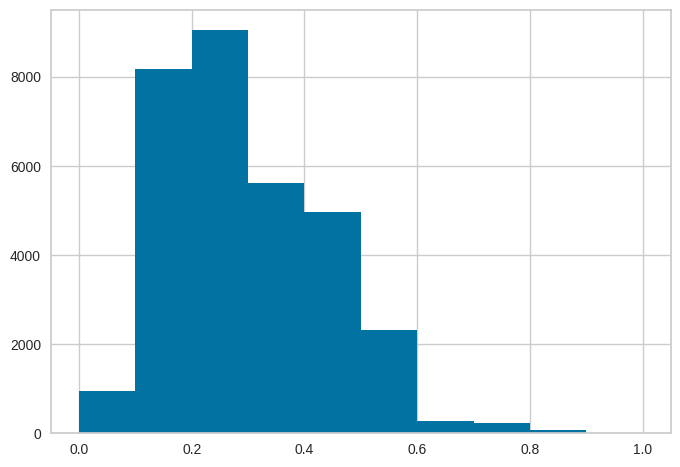

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['age'].hist()

<AxesSubplot: >

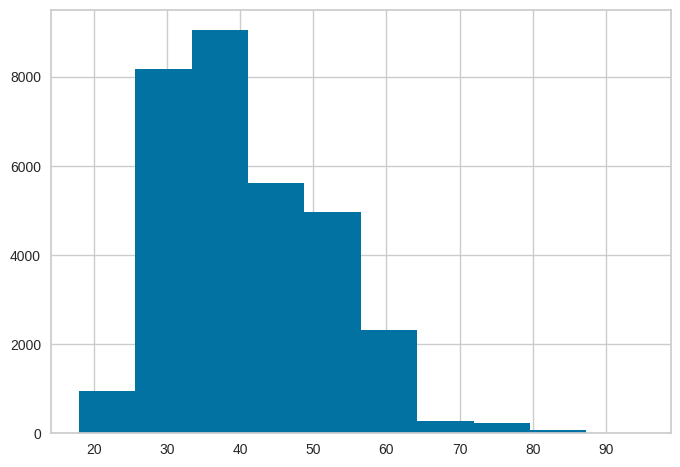

In [ ]:
get_config('X_train')['age'].hist()

COMPARING MODELS

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9073,0.9316,0.9073,0.8983,0.9010,0.4932,0.5004,14.1790
lightgbm,Light Gradient Boosting Machine,0.9070,0.9295,0.9070,0.8979,0.9006,0.4903,0.4979,2.0510
gbc,Gradient Boosting Classifier,0.9047,0.9196,0.9047,0.8925,0.8947,0.4479,0.4634,5.1670
xgboost,Extreme Gradient Boosting,0.9039,0.9240,0.9039,0.8949,0.8979,0.4790,0.4851,1.1320
rf,Random Forest Classifier,0.9031,0.9202,0.9031,0.8895,0.8914,0.4251,0.4447,4.4160
lr,Logistic Regression,0.9007,0.9019,0.9007,0.8851,0.8853,0.3823,0.4120,1.7310
lda,Linear Discriminant Analysis,0.8997,0.9023,0.8997,0.8892,0.8926,0.4487,0.4561,0.9720
ridge,Ridge Classifier,0.8991,0.0000,0.8991,0.8823,0.8800,0.3447,0.3850,0.5460
ada,Ada Boost Classifier,0.8982,0.9047,0.8982,0.8836,0.8866,0.4025,0.4192,1.8750
et,Extra Trees Classifier,0.8980,0.9023,0.8980,0.8820,0.8842,0.3823,0.4050,4.3780


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9073,0.9316,0.9073,0.8983,0.9010,0.4932,0.5004,14.2460
lightgbm,Light Gradient Boosting Machine,0.9070,0.9295,0.9070,0.8979,0.9006,0.4903,0.4979,1.8480
gbc,Gradient Boosting Classifier,0.9047,0.9196,0.9047,0.8925,0.8947,0.4479,0.4634,5.1750
xgboost,Extreme Gradient Boosting,0.9039,0.9240,0.9039,0.8949,0.8979,0.4790,0.4851,1.2800
rf,Random Forest Classifier,0.9031,0.9202,0.9031,0.8895,0.8914,0.4251,0.4447,4.4560
et,Extra Trees Classifier,0.8980,0.9023,0.8980,0.8820,0.8842,0.3823,0.4050,4.4930
dt,Decision Tree Classifier,0.8703,0.6948,0.8703,0.8726,0.8714,0.3829,0.3831,1.4810


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
compare_tree_models

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9073,0.9316,0.9073,0.8983,0.9010,0.4932,0.5004,14.246
lightgbm,Light Gradient Boosting Machine,0.9070,0.9295,0.9070,0.8979,0.9006,0.4903,0.4979,1.848
gbc,Gradient Boosting Classifier,0.9047,0.9196,0.9047,0.8925,0.8947,0.4479,0.4634,5.175
xgboost,Extreme Gradient Boosting,0.9039,0.9240,0.9039,0.8949,0.8979,0.4790,0.4851,1.280
rf,Random Forest Classifier,0.9031,0.9202,0.9031,0.8895,0.8914,0.4251,0.4447,4.456
et,Extra Trees Classifier,0.8980,0.9023,0.8980,0.8820,0.8842,0.3823,0.4050,4.493
dt,Decision Tree Classifier,0.8703,0.6948,0.8703,0.8726,0.8714,0.3829,0.3831,1.481


In [ ]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9073,0.9316,0.9073,0.8983,0.9010,0.4932,0.5004,14.1290
lightgbm,Light Gradient Boosting Machine,0.9070,0.9295,0.9070,0.8979,0.9006,0.4903,0.4979,1.8020
gbc,Gradient Boosting Classifier,0.9047,0.9196,0.9047,0.8925,0.8947,0.4479,0.4634,5.2970
xgboost,Extreme Gradient Boosting,0.9039,0.9240,0.9039,0.8949,0.8979,0.4790,0.4851,1.2880
rf,Random Forest Classifier,0.9031,0.9202,0.9031,0.8895,0.8914,0.4251,0.4447,4.2660
lr,Logistic Regression,0.9007,0.9019,0.9007,0.8851,0.8853,0.3823,0.4120,1.7610
lda,Linear Discriminant Analysis,0.8997,0.9023,0.8997,0.8892,0.8926,0.4487,0.4561,0.8260
ridge,Ridge Classifier,0.8991,0.0000,0.8991,0.8823,0.8800,0.3447,0.3850,0.7810
ada,Ada Boost Classifier,0.8982,0.9047,0.8982,0.8836,0.8866,0.4025,0.4192,1.8650
et,Extra Trees Classifier,0.8980,0.9023,0.8980,0.8820,0.8842,0.3823,0.4050,4.3360


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
# list of top 3 models by Recall
best_recall_models_top3

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                           

CREATE MODEL

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8932,0.8979,0.8932,0.8746,0.8778,0.3465,0.3696
1,0.9008,0.9094,0.9008,0.8857,0.8869,0.3965,0.4213
2,0.9011,0.8885,0.9011,0.8856,0.8855,0.3828,0.4133
3,0.8964,0.8949,0.8964,0.8785,0.8799,0.3523,0.3807
4,0.9017,0.9052,0.9017,0.8865,0.8858,0.3830,0.4154
5,0.8983,0.8907,0.8983,0.8810,0.8804,0.3504,0.3852
6,0.9039,0.8962,0.9039,0.8900,0.8871,0.3867,0.4251
7,0.8985,0.9060,0.8985,0.8819,0.8828,0.3689,0.3974
8,0.9074,0.9189,0.9074,0.8952,0.8956,0.4457,0.4685


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8932,0.8979,0.8932,0.8746,0.8778,0.3465,0.3696
1,0.9008,0.9094,0.9008,0.8857,0.8869,0.3965,0.4213
2,0.9011,0.8885,0.9011,0.8856,0.8855,0.3828,0.4133
3,0.8964,0.8949,0.8964,0.8785,0.8799,0.3523,0.3807
4,0.9017,0.9052,0.9017,0.8865,0.8858,0.3830,0.4154
5,0.8983,0.8907,0.8983,0.8810,0.8804,0.3504,0.3852
6,0.9039,0.8962,0.9039,0.8900,0.8871,0.3867,0.4251
7,0.8985,0.9060,0.8985,0.8819,0.8828,0.3689,0.3974
8,0.9074,0.9189,0.9074,0.8952,0.8956,0.4457,0.4685


In [ ]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8985,0.8973,0.8985,0.8823,0.8842,0.3813,0.4052
1,0.8989,0.8976,0.8989,0.8821,0.8811,0.3536,0.3896
2,0.9038,0.9104,0.9038,0.8897,0.8883,0.3971,0.4302
Mean,0.9004,0.9018,0.9004,0.8847,0.8845,0.3774,0.4083
Std,0.0024,0.0061,0.0024,0.0035,0.0030,0.0180,0.0167


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8929,0.8974,0.8929,0.8736,0.8763,0.3357,0.3614
1,0.9002,0.9082,0.9002,0.8845,0.8853,0.3854,0.4127
2,0.9024,0.8873,0.9024,0.8875,0.8856,0.3795,0.4156
3,0.8957,0.8943,0.8957,0.8770,0.8777,0.3363,0.3687
4,0.9014,0.9040,0.9014,0.8860,0.8846,0.3744,0.4095
5,0.8970,0.8900,0.8970,0.8788,0.8777,0.3320,0.3702
6,0.9046,0.8954,0.9046,0.8914,0.8867,0.3811,0.4250
7,0.8989,0.9052,0.8989,0.8821,0.8824,0.3642,0.3954
8,0.9083,0.9183,0.9083,0.8964,0.8958,0.4441,0.4704


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8651,0.6852,0.8651,0.8681,0.8665,0.3623,0.3624
1,0.8629,0.6909,0.8629,0.8689,0.8657,0.3656,0.3662
2,0.8682,0.6956,0.8682,0.8721,0.8701,0.3801,0.3803
3,0.8686,0.6876,0.8686,0.8701,0.8693,0.3708,0.3708
4,0.8803,0.7130,0.8803,0.8810,0.8806,0.4234,0.4234
5,0.8673,0.6939,0.8673,0.8713,0.8692,0.3763,0.3766
6,0.8689,0.6807,0.8689,0.8684,0.8686,0.3627,0.3627
7,0.8736,0.7115,0.8736,0.8780,0.8757,0.4087,0.4091
8,0.8707,0.6958,0.8707,0.8730,0.8718,0.3849,0.3850


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

TUNE MODELS

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8948,0.8582,0.8948,0.8810,0.8851,0.4030,0.4139
1,0.9103,0.8669,0.9103,0.9003,0.9022,0.4929,0.5055
2,0.9014,0.8579,0.9014,0.8882,0.8909,0.4272,0.4425
3,0.9014,0.8626,0.9014,0.8891,0.8922,0.4383,0.4504
4,0.9002,0.8629,0.9002,0.8855,0.8878,0.4048,0.4245
5,0.8992,0.8485,0.8992,0.8843,0.8870,0.4017,0.4204
6,0.8954,0.8421,0.8954,0.8784,0.8815,0.3683,0.3891
7,0.8985,0.8760,0.8985,0.8833,0.8861,0.3962,0.4152
8,0.9096,0.8688,0.9096,0.9008,0.9033,0.5042,0.5120


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8945,0.8414,0.8945,0.8807,0.8848,0.4020,0.4127
1,0.9096,0.8659,0.9096,0.9026,0.9051,0.5208,0.5251
2,0.9033,0.8391,0.9033,0.8936,0.8968,0.4710,0.4779
3,0.9024,0.8525,0.9024,0.8909,0.8940,0.4505,0.4609
4,0.9014,0.8667,0.9014,0.8897,0.8929,0.4444,0.4549
5,0.8973,0.8378,0.8973,0.8842,0.8880,0.4173,0.4282
6,0.8951,0.8436,0.8951,0.8800,0.8839,0.3905,0.4045
7,0.8998,0.8620,0.8998,0.8869,0.8902,0.4269,0.4394
8,0.9042,0.8365,0.9042,0.8915,0.8936,0.4398,0.4570


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8948,0.8582,0.8948,0.8810,0.8851,0.4030,0.4139
1,0.9103,0.8669,0.9103,0.9003,0.9022,0.4929,0.5055
2,0.9014,0.8579,0.9014,0.8882,0.8909,0.4272,0.4425
3,0.9014,0.8626,0.9014,0.8891,0.8922,0.4383,0.4504
4,0.9002,0.8629,0.9002,0.8855,0.8878,0.4048,0.4245
5,0.8992,0.8485,0.8992,0.8843,0.8870,0.4017,0.4204
6,0.8954,0.8421,0.8954,0.8784,0.8815,0.3683,0.3891
7,0.8985,0.8760,0.8985,0.8833,0.8861,0.3962,0.4152
8,0.9096,0.8688,0.9096,0.9008,0.9033,0.5042,0.5120


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['age',
                                                                          'balance',
                                                                          'day_of_week',
                                                                          '...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [ ]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8951,0.8719,0.8951,0.8843,0.8882,0.4291,0.4351
1,0.9084,0.8931,0.9084,0.8992,0.9017,0.4960,0.5043
2,0.8989,0.8644,0.8989,0.8864,0.8900,0.4286,0.4391
3,0.8973,0.8643,0.8973,0.8849,0.8887,0.4236,0.4330
4,0.9068,0.8942,0.9068,0.8962,0.8987,0.4739,0.4854
5,0.8967,0.8627,0.8967,0.8828,0.8866,0.4072,0.4195
6,0.8986,0.8733,0.8986,0.8850,0.8885,0.4164,0.4296
7,0.8976,0.8785,0.8976,0.8887,0.8921,0.4529,0.4571
8,0.9115,0.8957,0.9115,0.9034,0.9058,0.5184,0.5254


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-11-30 22:11:41,779] Searching the best hyperparameters using 31647 samples...
[I 2023-11-30 22:12:50,715] Finished hyperparameter search!


ENSEMBLE MODELS

In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8891,0.8803,0.8891,0.8764,0.8810,0.3892,0.3958
1,0.8992,0.8974,0.8992,0.8890,0.8925,0.4507,0.4571
2,0.9008,0.8806,0.9008,0.8887,0.8921,0.4393,0.4501
3,0.9011,0.8932,0.9011,0.8894,0.8927,0.4434,0.4536
4,0.9046,0.8850,0.9046,0.8930,0.8957,0.4563,0.4689
5,0.8970,0.8757,0.8970,0.8843,0.8881,0.4195,0.4294
6,0.8954,0.8727,0.8954,0.8828,0.8869,0.4146,0.4234
7,0.8998,0.8834,0.8998,0.8888,0.8923,0.4453,0.4533
8,0.9017,0.9016,0.9017,0.8904,0.8937,0.4499,0.4595


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8660,0.6880,0.8660,0.8692,0.8676,0.3675,0.3676
1,0.8689,0.6978,0.8689,0.8727,0.8707,0.3844,0.3847
2,0.8632,0.6752,0.8632,0.8650,0.8641,0.3458,0.3459
3,0.8733,0.6961,0.8733,0.8740,0.8737,0.3899,0.3900
4,0.8806,0.7073,0.8806,0.8797,0.8801,0.4175,0.4175
5,0.8670,0.6937,0.8670,0.8712,0.8690,0.3755,0.3758
6,0.8720,0.6848,0.8720,0.8707,0.8714,0.3736,0.3737
7,0.8793,0.7206,0.8793,0.8824,0.8808,0.4301,0.4304
8,0.8726,0.6934,0.8726,0.8731,0.8729,0.3854,0.3855


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

BLEND MODELS

In [ ]:
# top 3 models based on recall
best_recall_models_top3

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                           

In [ ]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9017,0.9245,0.9017,0.8905,0.8937,0.4515,0.4611
1,0.9134,0.9356,0.9134,0.9047,0.9066,0.5187,0.5290
2,0.9036,0.9199,0.9036,0.8924,0.8954,0.4576,0.4682
3,0.9043,0.9312,0.9043,0.8929,0.8958,0.4582,0.4697
4,0.9081,0.9343,0.9081,0.8984,0.9010,0.4895,0.4987
5,0.9081,0.9293,0.9081,0.8972,0.8992,0.4739,0.4878
6,0.9074,0.9259,0.9074,0.8969,0.8994,0.4775,0.4890
7,0.9061,0.9336,0.9061,0.8956,0.8983,0.4732,0.4838
8,0.9096,0.9362,0.9096,0.9006,0.9030,0.5016,0.5100


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7d407810bb80>),
                             ('Light Gradient Boosting Machine',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100...
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=None,
                                                         random_state=123,
                                                         subsample=1.0,
                                                         tol=0.0001,
                                                         validation_fraction=0.1,
                                                         verbose=0,
                                                         warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

STACK MODELS

In [ ]:
# stack models
stack_models(best_recall_models_top3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:40:10
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Classifier


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

PLOT MODEL

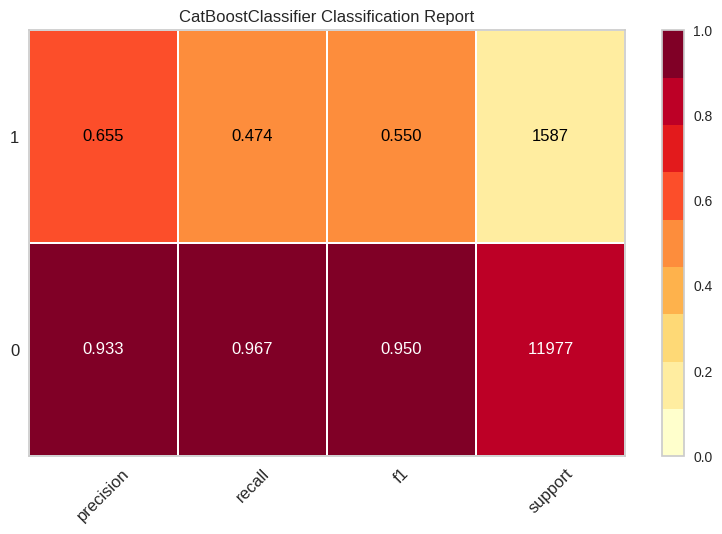

In [ ]:
# plot class report
plot_model(best, plot = 'class_report')

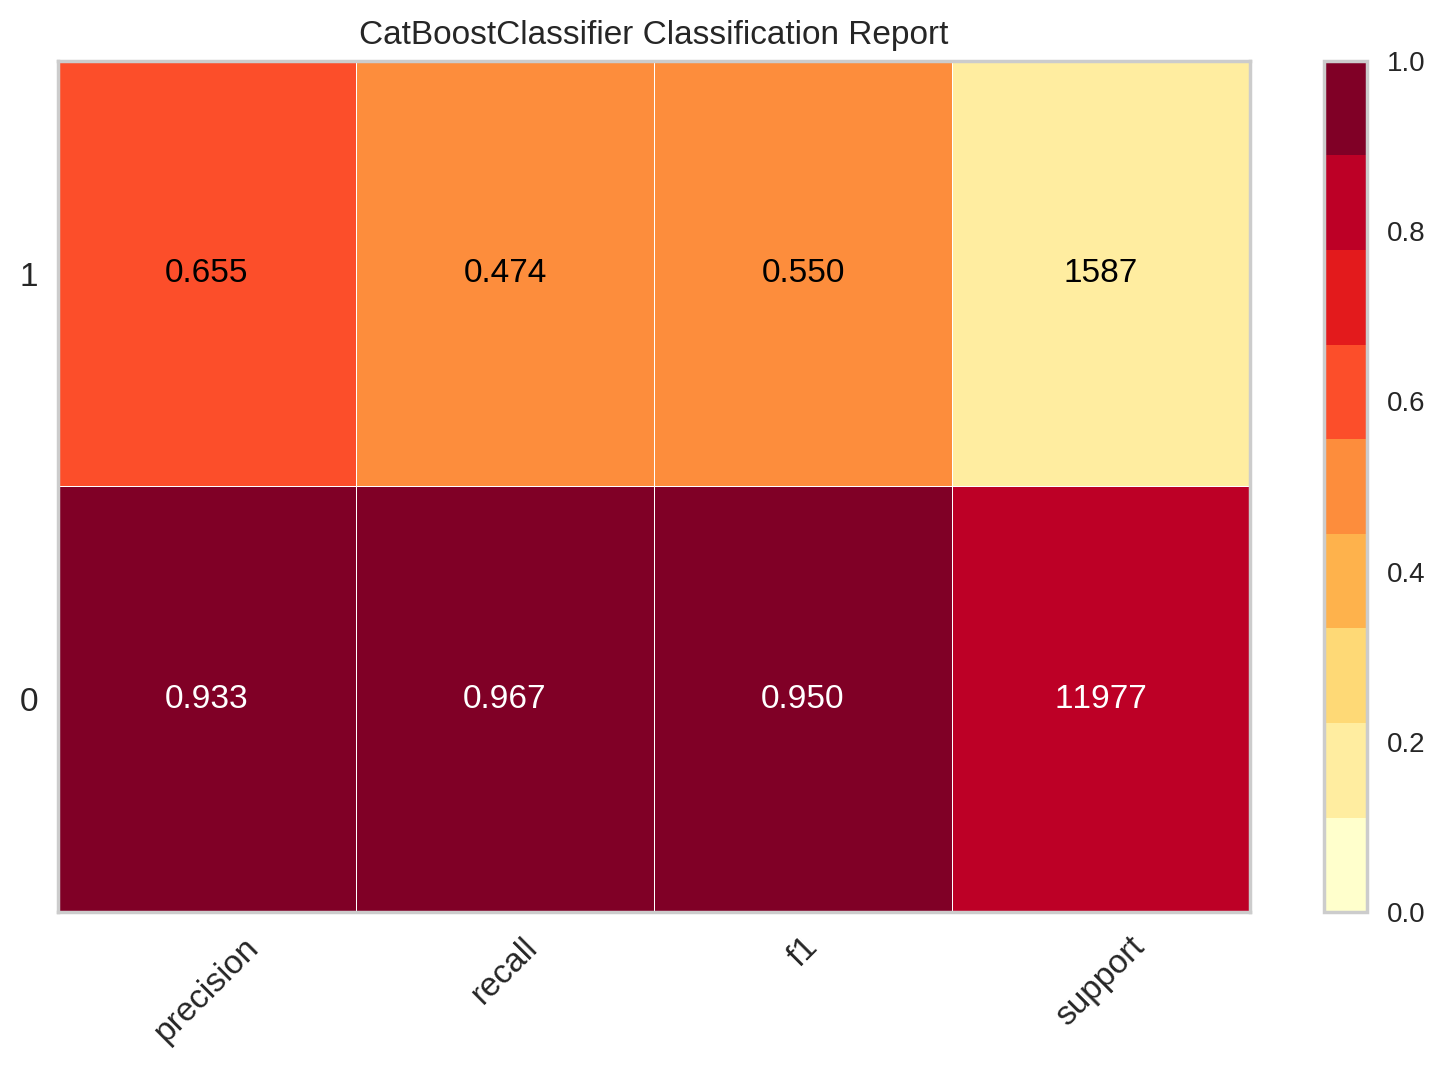

In [ ]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [ ]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

INTERPRET MODEL

In [ ]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9002,0.9239,0.9002,0.8911,0.8944,0.4637,0.4687
1,0.9106,0.9349,0.9106,0.9022,0.9046,0.5127,0.5200
2,0.9039,0.9179,0.9039,0.8945,0.8976,0.4758,0.4825
3,0.9039,0.9301,0.9039,0.8936,0.8967,0.4674,0.4760
4,0.9062,0.9338,0.9062,0.8970,0.8999,0.4872,0.4942
5,0.9125,0.9285,0.9125,0.9037,0.9058,0.5140,0.5237
6,0.9065,0.9235,0.9065,0.8973,0.9001,0.4882,0.4954
7,0.9071,0.9301,0.9071,0.8979,0.9006,0.4903,0.4979
8,0.9077,0.9356,0.9077,0.8988,0.9015,0.4951,0.5024


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

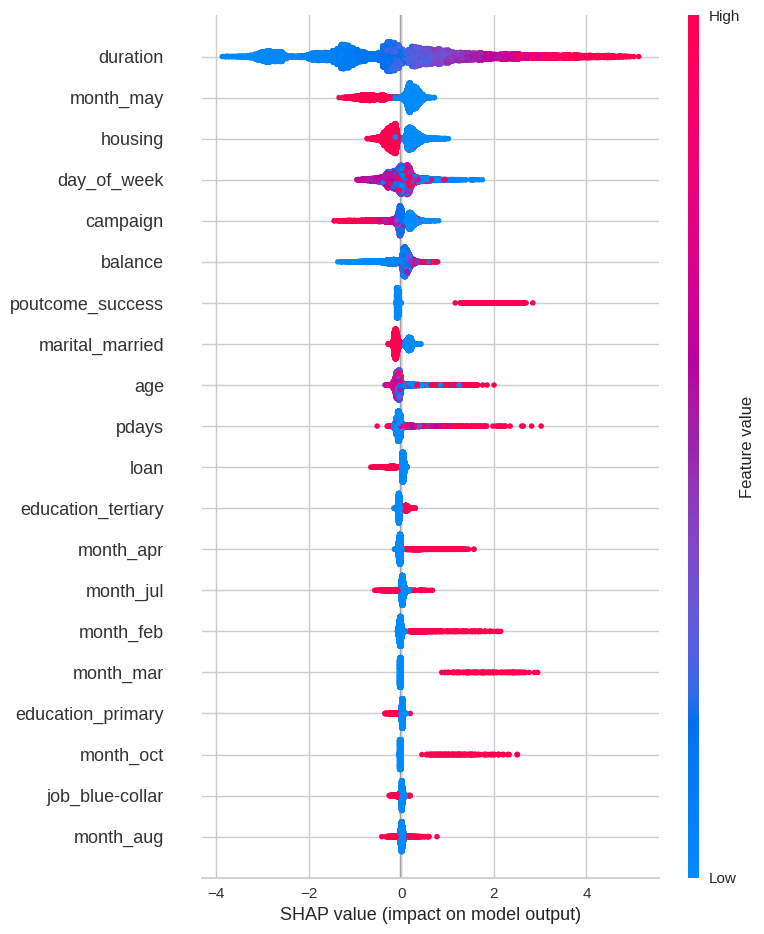

In [ ]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

GETTING LEADERBOARD

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/58 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.9007,0.9019,0.9007,0.8851,0.8853,0.3823,0.4120
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.8888,0.7538,0.8888,0.8650,0.8676,0.2768,0.3096
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.8514,0.8125,0.8514,0.8661,0.8580,0.3466,0.3491
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.8703,0.6948,0.8703,0.8726,0.8714,0.3829,0.3831
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.8953,0.0000,0.8953,0.8755,0.8731,0.3015,0.3460
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.8991,0.0000,0.8991,0.8823,0.8800,0.3447,0.3850
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9031,0.9202,0.9031,0.8895,0.8914,0.4251,0.4447
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.6305,0.7076,0.6305,0.8491,0.6917,0.1501,0.1991
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.8982,0.9047,0.8982,0.8836,0.8866,0.4025,0.4192


In [ ]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day_of_week',
                                             'duration', 'campaign', 'pdays',
                                             'previous'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=N...
                                                                    'month',
                                                                    'poutcome'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ['trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7d3fbce1d990>]],
         verbose=False)

USING AUTOML

In [ ]:
automl()

DASHBOARD

In [ ]:
# dashboard function
dashboard(dt, display_format ='inline')

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...


ValueError: ignored

CREATING GRADIO APP

In [ ]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b8bb41f6b7bf959089.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


CREATE API

In [ ]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


CREATE DOCKER

In [ ]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


FINALIZE MODEL

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day_of_week',
                                             'duration', 'campaign', 'pdays',
                                             'previous'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=N...
                                                                    'poutcome'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x7d3fb6a3acb0>)],
         verbose=False)

CONVERT MODEL

In [ ]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double[] score(double[] input) {
        double[] var0;
        if (input[36] <= 0.14184488356113434) {
            if (input[40] <= 0.5) {
                if (input[36] <= 0.05733058415353298) {
                    if (input[35] <= 0.5) {
                        if (input[30] <= 0.5) {
                            if (input[0] <= 0.551948070526123) {
                                if (input[24] <= 0.5) {
                                    if (input[33] <= 0.5) {
                                        if (input[6] <= 0.5) {
                                            if (input[32] <= 0.5) {
                                                if (input[38] <= 0.01146788988262415) {
                                                    if (input[23] <= 0.15000000596046448) {
                                                        if (input[36] <= 0.040324658155441284) {
                                                            if (input[34] <= 0.5) {


DEPLOY MODEL

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

SAVE/LOAD MODEL

In [ ]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day_of_week',
                                              'duration', 'campaign', 'pdays',
                                              'previous'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=N...
                                                                     'month',
                                                                     'poutcome'],
                                                               dro

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day_of_week',
                                             'duration', 'campaign', 'pdays',
                                             'previous'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              f...
                                                                    'month',
                                                                    'poutcome'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7d3fb6aab2b0>)],
         verbose=False)

SAVE/LOAD EXPERIMENT

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 44)"
6,Transformed train set shape,"(31647, 44)"
7,Transformed test set shape,"(13564, 44)"
8,Ordinal features,4
9,Numeric features,7
